<a href="https://colab.research.google.com/github/Julesih/marked-beetle-analysis/blob/main/Thresholding_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
def threscrop(img):
  #convert to grayscale and apply adaptive thresholding
  grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  blur = cv2.GaussianBlur(grayscale,(5,5),0).astype('uint8')
  retval,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  #return thresh

  #detect edges and crop the image
  canny = cv2.Canny(thresh, 50, 200)
  pts = np.argwhere(canny > 0)
  y1,x1 = pts.min(axis=0)
  y2,x2 = pts.max(axis=0)
  cropped_img = thresh[y1:y2, x1:x2]

  return cropped_img

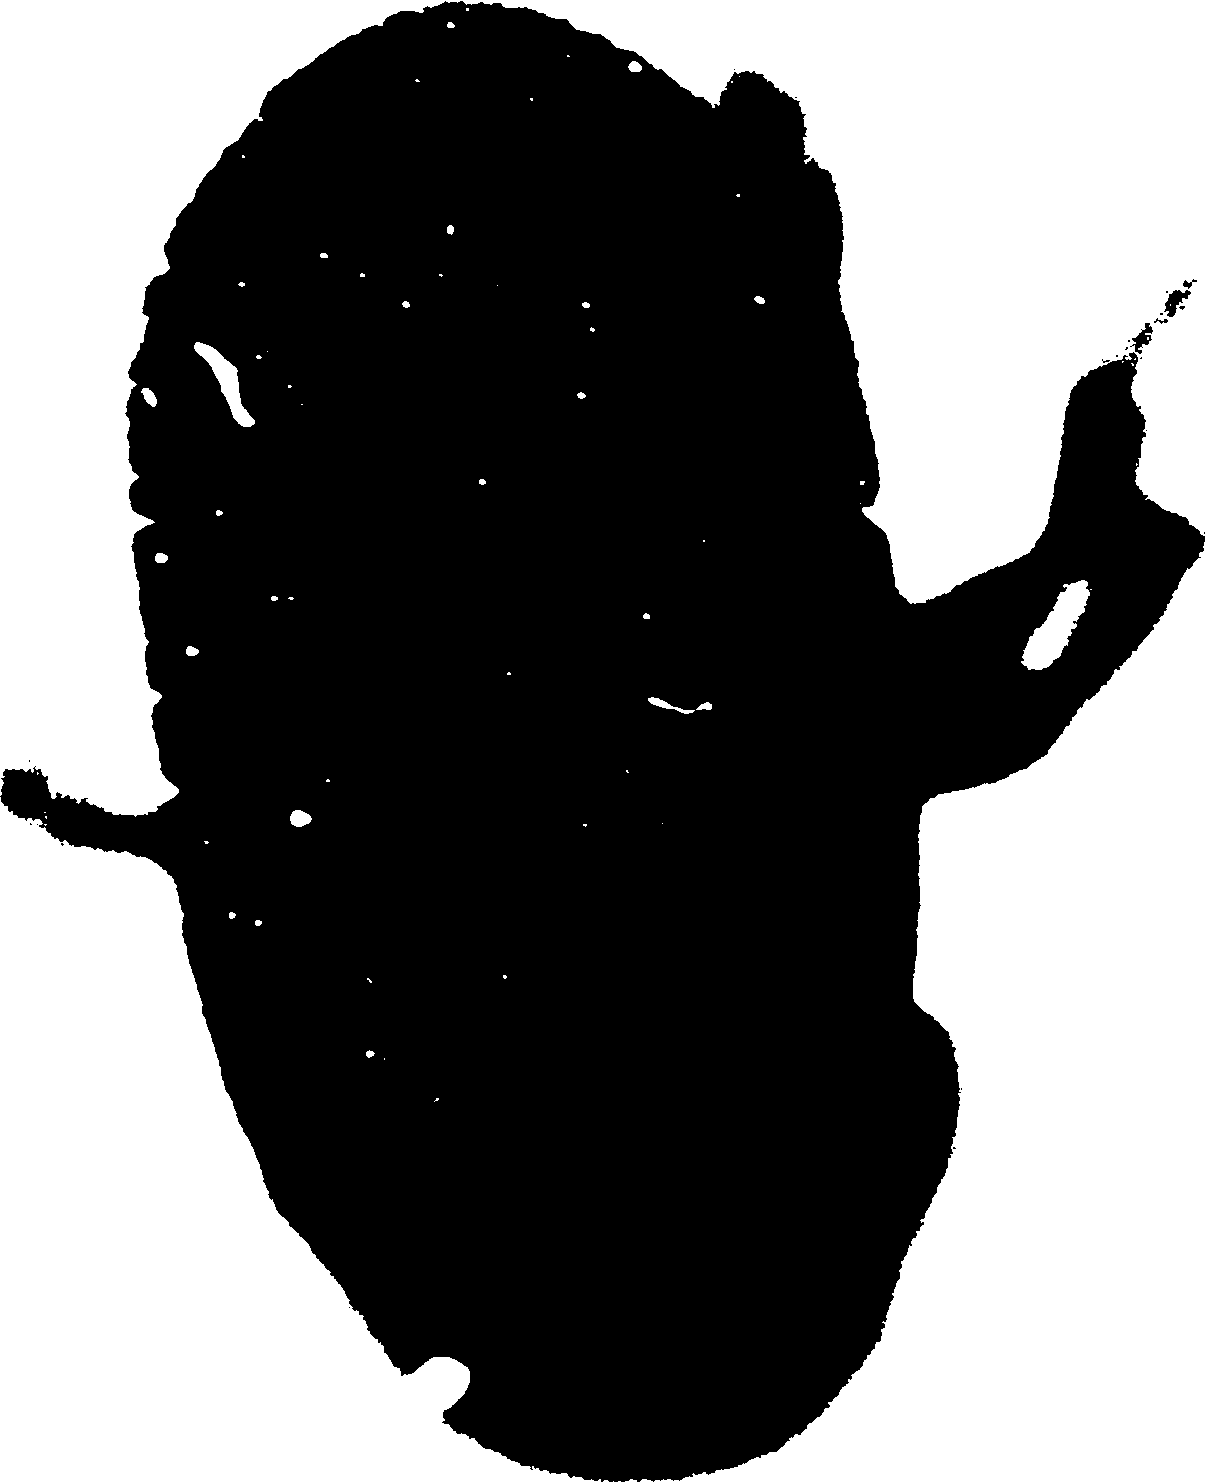

In [5]:
image=cv2.imread('drive/MyDrive/MarkedBeetleImageAnalysis/PaperedControl8d.tif')
cv2_imshow(threscrop(image))